<a href="https://colab.research.google.com/github/TheGodseeker/ML_PR/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [3]:
df = pd.read_csv("/content/anime.csv")# чтение файла
df #y - type; x - members

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
df["type"].describe(include="all")

count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

In [ ]:
mean = df['members'].mean()# (среднее) ваш код здесь
mean

18071.33886448674

In [ ]:
median = df['members'].median()# (медиана) ваш код здесь
median

1550.0

In [ ]:
mode = df['members'].mode()# (мода) ваш код здесь
mode

0    60
1    72
Name: members, dtype: int64

In [ ]:
min = df['members'].min()# (минимум) ваш код здесь
min

5

In [ ]:
max = df['members'].max()# (максимум) ваш код здесь
max

1013917

In [ ]:
std = df['members'].std()# (стандартное отклонение) Ваш код здесь
std

54820.67692490696

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [ ]:
q1 = df['members'].quantile(0.25)# (25% квантиль) ваш код здесь
q1

225.0

In [ ]:
q2 = df['members'].quantile(0.5)# (50% квантиль) ваш код здесь
q2

1550.0

In [ ]:
q3 = df['members'].quantile(0.75)# (75% квантиль) ваш код здесь
q3

9437.0

In [ ]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

9212.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Операясь на значения медианы, максимума и минимума, можно сказать, что в датасете присутствует выброс.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

{'Movie': 24326080, 'TV': 161643014, 'OVA': 19820109, 'Special': 12865078, 'Music': 640178, 'ONA': 2711146}


<Axes: ylabel='Count'>

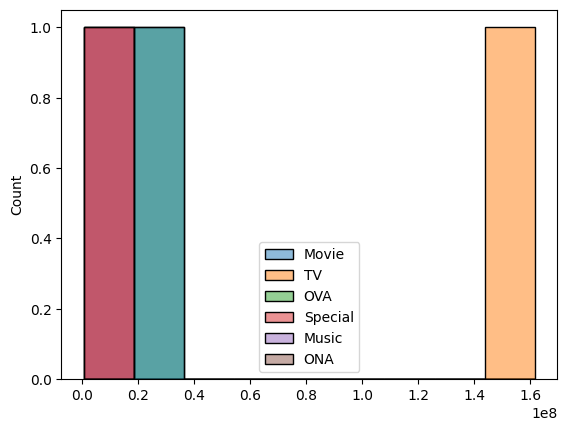

In [40]:
types = {}

for val in df["type"]:
  if val not in types: types[val] = 0

types.popitem()

for cur_type in types:
  cur_mem = df[df["type"]== cur_type]["members"]
  for n in cur_mem: types[cur_type] += n

print(types)

sns.histplot( x = types.values(), hue = types.keys())



> По гистограме можно сказать, аниме типа "TV" и "Special" входят в топ 3 популярных типов. За третье место боряться "Movie" и "OVA" (их цвета накладываются друг на друга)



Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: ylabel='members'>

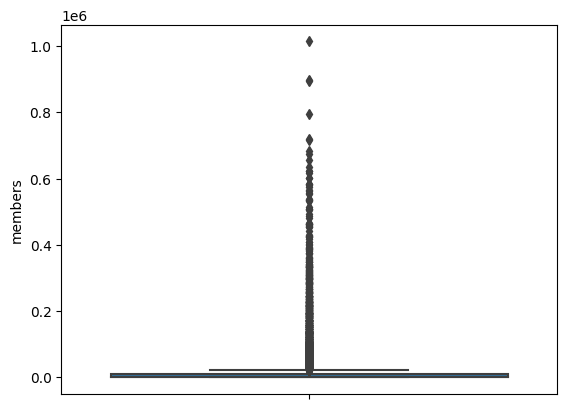

In [46]:
sns.boxplot(data = df, y = "members")



> Определить медиану, опираясь на boxplot, построенном только на числовой переменной, невозможно.



[24326080, 161643014, 19820109, 12865078, 640178, 2711146]


<Axes: >

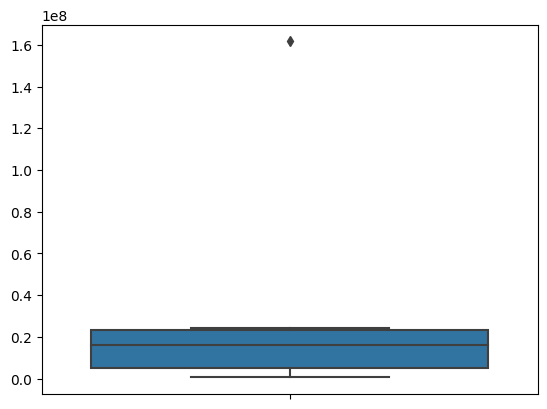

In [51]:
sns.boxplot( y = list(types.values()))



> Медиана примерно равна 18 000 000



Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: xlabel='episodes', ylabel='members'>

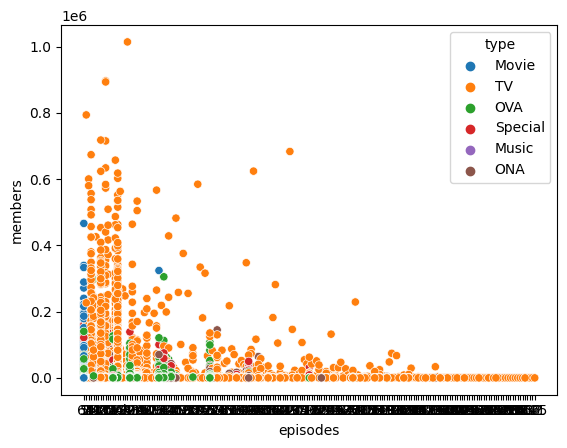

In [52]:
#plt.figure()
#plt.scatter(df['episodes'], df['members'], color='purple')
#plt.title('Диаграмма рассеивания для episodes и members')
#plt.xlabel('episodes')
#plt.ylabel('members')
#plt.show()

sns.scatterplot(data = df, x = "episodes", y = "members", hue="type")



> Больше всего тайтлов - ТВ-формата. Чем меньше у тайтла эпизодов, тем больше зрителей



Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<ipython-input-76-ec51405d706c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

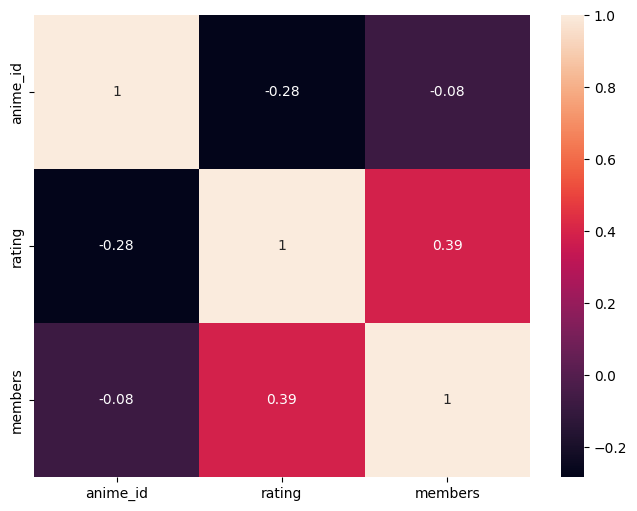

In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)



> Данные из столбцов "rating" и "members" хорошо коррелируют



**Какие выводы можно сделать на основе графиков и матрицы корреляции?**

**Итог:** можно определить, что аниме в формате ТВ с малым количеством  собирают больше всего зрителей. Данный формат входит в число популярных.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]